In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

When looking at NaN values, make sure to check data description. In the case of Alley, a NaN would simply be No alley access so we need to fill out those NaNs

In [100]:
df.Alley.fillna('NoAlley', inplace=True)
df.FireplaceQu.fillna('NoFireplace', inplace=True)
df.GarageType.fillna('NoGarage', inplace=True)
df.GarageYrBlt.fillna(-1, inplace=True)
df.GarageFinish.fillna('NoGarage', inplace=True)
df.GarageQual.fillna('NoGarage', inplace=True)
df.GarageCond.fillna('NoGarage', inplace=True)
df.PoolQC.fillna('NoPool', inplace=True)
df.Fence.fillna('NoFence', inplace=True)
df.MiscFeature.fillna('None', inplace=True)
df.BsmtQual.fillna('NoBasement', inplace=True)
df.BsmtCond.fillna('NoBasement', inplace=True)
df.BsmtExposure.fillna('NoBasement', inplace=True)
df.BsmtFinType1.fillna('NoBasement', inplace=True)
df.BsmtFinType2.fillna('NoBasement', inplace=True)

In [101]:
df_test = df.copy()

In [102]:
df_test = df_test[['MasVnrArea', 'Neighborhood']]

In [103]:
df_test[df['MasVnrArea'].isnull()]

,MasVnrArea,Neighborhood
234,NaN,Gilbert
529,NaN,Crawfor
650,NaN,Somerst
936,NaN,SawyerW
973,NaN,Somerst
977,NaN,Somerst
1243,NaN,NridgHt
1278,NaN,CollgCr


In [104]:
df_test['MasVnrArea'] = df_test.groupby('Neighborhood').transform(lambda x:x.fillna(x.median()))

In [105]:
df['MasVnrArea'] = df_test['MasVnrArea']

In [109]:
df['MasVnrArea'].iloc[1243]

289.0

### TODO

1. Fill MasVnrArea by mean of area
2. Fill LotFrontage by mean of area
3. Fill Electrical by mode of area
4. Fill MasVnrType by mode of area

<AxesSubplot:>

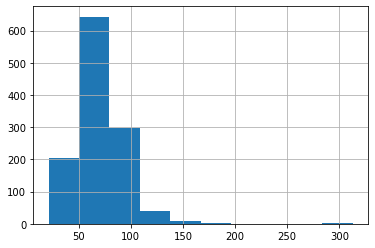

In [5]:
df['LotFrontage'].hist()

In [6]:
df['LotFrontage'].median()

69.0

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

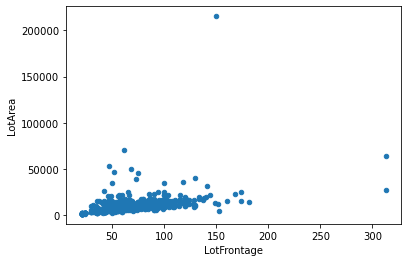

In [7]:
df.plot.scatter(x='LotFrontage', y='LotArea')